In [3]:
from random import Random
SEED = 5
random_gen = Random(x=SEED)

def generate_random_points(N=1000):
    lst_x = [random_gen.uniform(a=0, b=1) for _ in range(N)]
    lst_y = [random_gen.uniform(a=0, b=1) for _ in range(N)]
    return  lst_x, lst_y

data_x, data_y = generate_random_points()
print(data_x[:10])
print(data_y[:10])

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]
[0.8713187027692235, 0.039767712548386625, 0.5888551653281111, 0.11745374212114823, 0.721120830858009, 0.6113236281477744, 0.6120458139259322, 0.22152129960368494, 0.9490212551961823, 0.11102495123278444]


C:\Users\EGYPT\AppData\Local\Temp\ipykernel_4268\3064481155.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


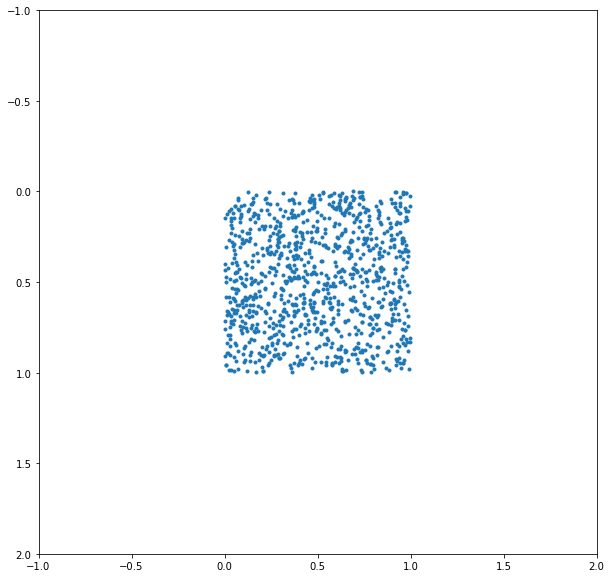

In [11]:
from matplotlib.pyplot import figure
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(data_x, data_y, marker=".")
ax.set_xlim(left= -1, right=2)
ax.set_ylim(top=-1, bottom=2)
fig.show()

In [12]:
def loss(data_x, data_y, x_p, y_p):
    n_inv = 1/len(data_x)
    return n_inv * sum(
        [ ((x_i-x_p)**2 + (y_i-y_p)**2)**0.5 for x_i, y_i in zip(data_x, data_y)]
    )

In [14]:
STEP = 0.01
MESH_SIZE = 300
x_mesh = [-1+STEP*i for i in range(MESH_SIZE)]
y_mesh = [-1+STEP*i for i in range(MESH_SIZE)]
loss_mesh = [
    [loss(data_x, data_y,x, y) for x in x_mesh]
    for y in y_mesh
]
loss_mesh

[[2.129869993191281,
  2.1228853735237103,
  2.115924952190503,
  2.108988968491298,
  2.102077664033643,
  2.095191282742723,
  2.0883300708704624,
  2.081494277004142,
  2.074684152074442,
  2.0678999493628702,
  2.0611419245085787,
  2.05441033551453,
  2.04770544275296,
  2.0410275089701835,
  2.034376799290618,
  2.027753581220037,
  2.0211581246480606,
  2.0145907018497953,
  2.0080515874865825,
  2.001541058605909,
  1.9950593946403377,
  1.988606877405509,
  1.982183791097125,
  1.9757904222869007,
  1.9694270599174546,
  1.9630939952960964,
  1.956791522087465,
  1.9505199363049868,
  1.9442795363011294,
  1.938070622756376,
  1.9318934986669372,
  1.9257484693311158,
  1.9196358423342865,
  1.913555927532496,
  1.9075090370345866,
  1.9014954851828452,
  1.8955155885321144,
  1.8895696658273493,
  1.8836580379795418,
  1.877781028040027,
  1.871938961173061,
  1.8661321646267424,
  1.8603609677020725,
  1.8546257017202923,
  1.848926699988365,
  1.8432642977625215,
  1.837638

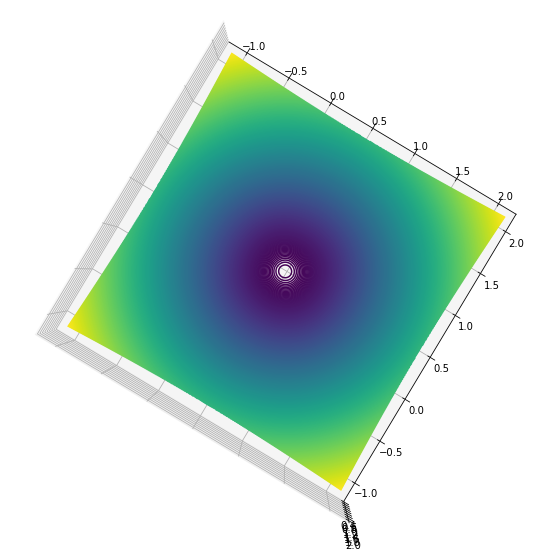

In [17]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.contour(x_mesh, y_mesh, loss_mesh, levels=500)
ax.view_init(elev=90)

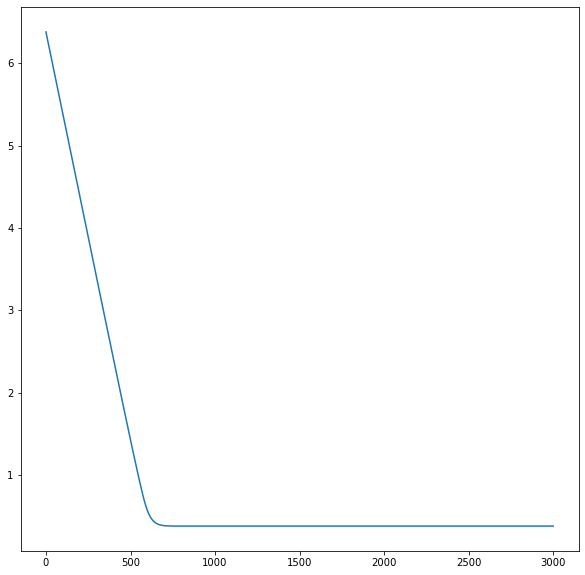

In [19]:
x_p, y_p = 5,5
EPOCHS = 3000
LR = 0.01
H = 0.01
Epoch_losses=[]
for _ in range(EPOCHS):
    Epoch_losses.append(loss(data_x, data_y, x_p, y_p))
    dLoss_dx = loss(data_x,data_y, x_p+H,y_p)-loss(data_x,data_y, x_p, y_p)
    dLoss_dx/=H
    dLoss_dy = loss(data_x, data_y, x_p, y_p+H) - loss(data_x,data_y, x_p,y_p)
    dLoss_dy/=H
    x_p -= dLoss_dx*LR
    y_p -= dLoss_dy*LR

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(Epoch_losses)